In [3]:
# L1_Real       - Real power (Phase 1)
# L1_Image      - Reactive power (Phase 1)
# L1_App        - Apparent power (Phase 1)
# L1_Pf         - Power factor of 1/6 component (Phase 1)
# L1_TimeTicks  - Time ticks (Phase 1)

# L2_Real       - Real power (Phase 2)
# L2_Image      - Reactive power (Phase 2)
# L2_App        - Apparent power (Phase 2)
# L2_Pf         - Power factor of 1/6 component (Phase 2)
# L2_TimeTicks  - Time ticks (Phase 2)

# HF            - 4096xN spectrogram of high frequency noise
# HF_TimeTicks  - high frequency noise time ticks

In [36]:
import loader
import visuals
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = loader.load_train_file(0)
visuals.to_datetimes(data)

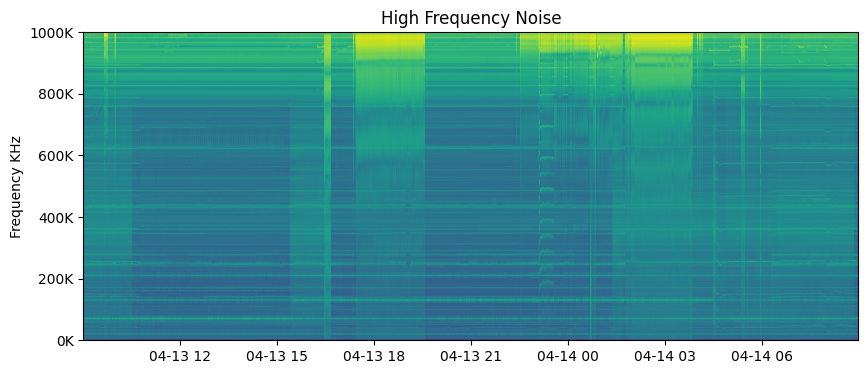

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
visuals.plot_hf_noise(ax, data)

In [112]:
def calc_var(a, b):
    return np.sum(np.power(a - b, 2))

def detect_outliers(data, data_x, d):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - d * iqr
    upper_bound = q3 + d * iqr
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    outliers_x = [data_x[i] for i, x in enumerate(data) if x < lower_bound or x > upper_bound]

    return outliers, outliers_x


hf = data['HF']

hf_var = [calc_var(hf[i], hf[i+1]) for i in range(hf.shape[0] - 1)]
hf_var_x = data['HF_TimeTicks'][:-1]

In [113]:
np.split(hf_var, 20)
np.split(hf_var_x, 20)

# hf_changes, hf_changes_x = detect_outliers(hf_var, hf_var_x, 12)

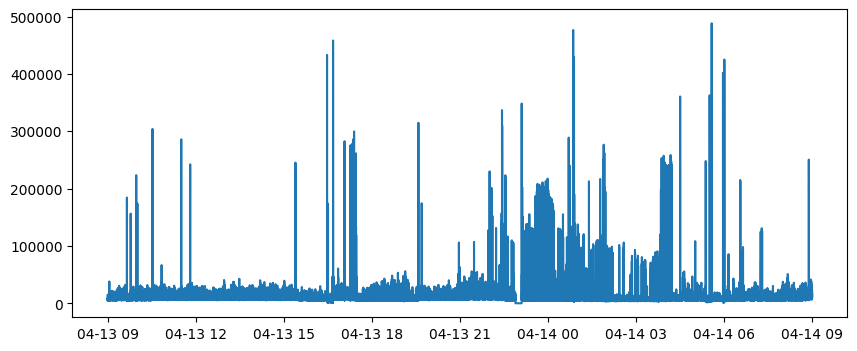

In [116]:
# fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(hf_var_x, hf_var)
# plt.show()